# MNIST deep learning experiments

### Experiment showing the effect of batch normalization on a standard CNN architexture applied to the MNIST dataset

In [19]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from Training_validation_accuracy_plotter import plot_train_val_accuracy
from Two_model_accuracy_plotter import plot_accuracy_two_models

#### 1. Importing and preprocessing the MNIST data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

In [3]:
print("Number of training examples:")
print(train_images.shape[0])
print("Training Images shape:")
print(train_images.shape[1:])
print("Number of validation examples:")
print(val_images.shape[0])
print("Validation images shape:")
print(val_images.shape[1:])

Number of training examples:
60000
Training Images shape:
(28, 28)
Number of validation examples:
10000
Validation images shape:
(28, 28)


In [4]:
print("Pre-encoding training labels shape:")
print(train_labels.shape)
print("e.g. " + str(train_labels[0]))
train_labels = to_categorical(train_labels)
print("Post-encoding training labels shape:")
print(train_labels.shape)
print("e.g. " + str(train_labels[0]))

val_labels = to_categorical(val_labels)

Pre-encoding training labels shape:
(60000,)
e.g. 5
Post-encoding training labels shape:
(60000, 10)
e.g. [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_images = np.expand_dims(train_images, axis = 3)
val_images = np.expand_dims(val_images, axis = 3)

train_generator = train_datagen.flow(train_images, train_labels, batch_size = 64)
val_generator = val_datagen.flow(val_images, val_labels, batch_size = 64)

### 2. Defining the model (without batch normalization)

In [6]:
model = Sequential([
    Conv2D(64, (3,3), padding="same", input_shape=(28,28,1)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    Conv2D(128, (3,3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    Conv2D(254, (3,3)),
    Activation("relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 254)         2

### 3. Training the model

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model_save_dir = "C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1/Saved_model"
checkpoint = ModelCheckpoint(model_save_dir, monitor = "val_accuracy", save_best_only = True, mode="max")
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[checkpoint],
                    verbose=2
                   )

Epoch 1/20
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model\assets
938/938 - 50s - loss: 0.0229 - accuracy: 0.9577 - val_loss: 0.0058 - val_accuracy: 0.9901
Epoch 2/20
938/938 - 52s - loss: 0.0074 - accuracy: 0.9875 - val_loss: 0.0092 - val_accuracy: 0.9835
Epoch 3/20
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model\assets
938/938 - 59s - loss: 0.0054 - accuracy: 0.9912 - val_loss: 0.0055 - val_accuracy: 0.9904
Epoch 4/20
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model\assets
938/938 - 56s - loss: 0.0040 - accuracy: 0.9934 - val

### 4. Plotting the results

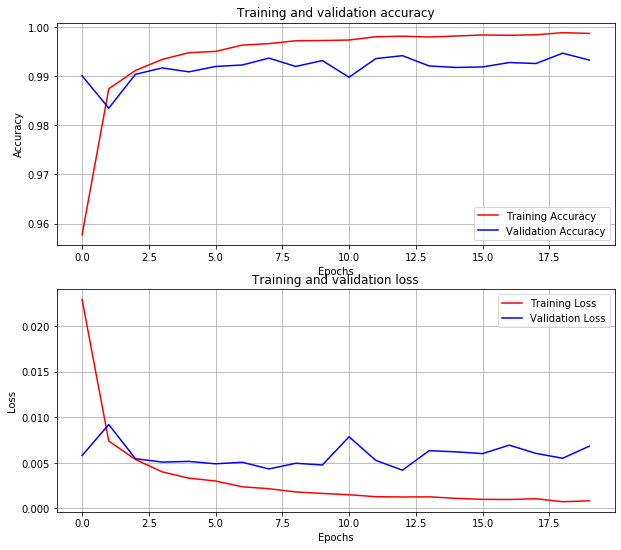

In [12]:
file_save_path = "C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1/Graphs/Basic_CNN"
plot_train_val_accuracy(history, file_save_path)

### 5. Defining the model (with batch normalization)

In [13]:
model_with_batch_norm = Sequential([
    Conv2D(64, (3,3), padding="same", input_shape=(28,28,1)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    Conv2D(128, (3,3)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
    Conv2D(254, (3,3)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    
    Dense(10, activation="softmax")
])

model_with_batch_norm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 12, 12, 128)      

### 6. Training the model

In [14]:
model_with_batch_norm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model_with_batch_norm_save_dir = "C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1/Saved_model_with_batch_norm"
checkpoint = ModelCheckpoint(model_with_batch_norm_save_dir, monitor = "val_accuracy", save_best_only = True, mode="max")
history_with_batch_norm = model_with_batch_norm.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[checkpoint],
                    verbose=2
                   )

Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model_with_batch_norm\assets
938/938 - 105s - loss: 0.0168 - accuracy: 0.9700 - val_loss: 0.0079 - val_accuracy: 0.9866
Epoch 2/20
938/938 - 131s - loss: 0.0075 - accuracy: 0.9873 - val_loss: 0.0088 - val_accuracy: 0.9839
Epoch 3/20
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model_with_batch_norm\assets
938/938 - 130s - loss: 0.0059 - accuracy: 0.9902 - val_loss: 0.0071 - val_accuracy: 0.9888
Epoch 4/20
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1\Saved_model_with_batch_norm\assets
938/938 - 131s - loss: 0.0047 - accuracy: 0.9917 - val_loss: 0.0061 - val_accuracy: 0.9906
Epoch 5/20
938/938 - 118s - loss: 0.0040 - accuracy: 0.9934 - val_loss: 0.0137 - val_accuracy: 0.9784
Epoch 6/20
938/938 - 130s - loss: 0.0034 - 

### 7. Plotting the model

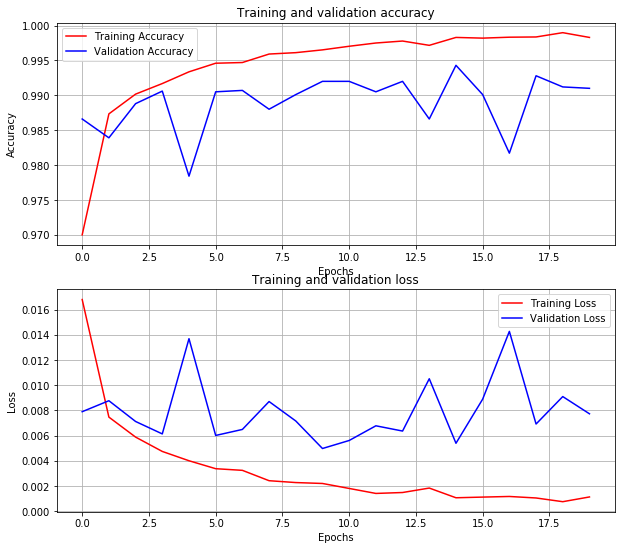

In [20]:
batch_norm_file_save_path = "C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1/Graphs/CNN_with_batch_norm"
plot_train_val_accuracy(history_with_batch_norm, batch_norm_file_save_path)

### 8. Comparing the models

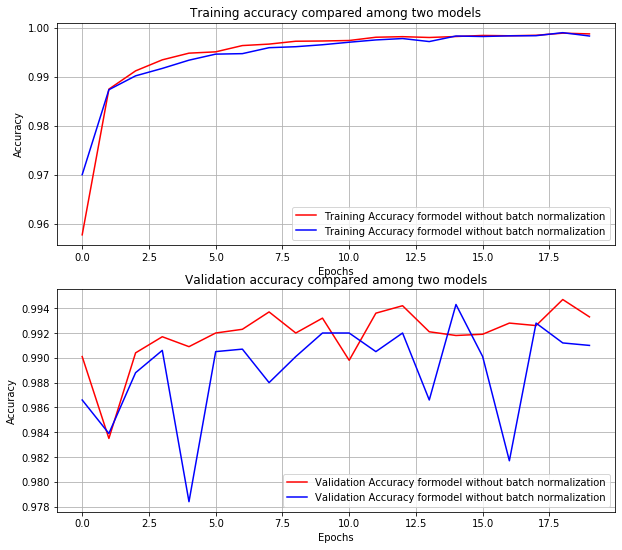

In [21]:
two_model_plot_file_save_path = "C:/Users/Jason/Documents/Data Science/MNISTDeepLearningExperiments/Experiment1/Graphs/Batch_norm_vs_none_plot"
plot_accuracy_two_models(history, "model without batch normalization", history_with_batch_norm, "model with batch normalization", two_model_plot_file_save_path)

### 9. Conclusion

In this particular example, batch normlization had the effect of making the accuracy (training and validation) less stable during training - this is surprising.